In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [41]:
#Study CSV Files
sugar_path = "Resources/sugar_per_person_g_per_day-FAO.csv"
obesity_path = "Resources/obesity-cleaned - WHO.csv"

#Read CSV Files
sugar_data = pd.read_csv(sugar_path)
obesity_data = pd.read_csv(obesity_path)


#Collect Sugar and Obesity for past 10 years
sugar_df = pd.DataFrame(sugar_data,columns = ['Country', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', 
                                                '2011', '2012','2013'])
obesity_df = pd.DataFrame(obesity_data,columns = ['Country', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', 
                                                '2011', '2012','2013'])
sugar_df=sugar_df.set_index('Country')
obesity_df=obesity_df.set_index('Country')

obesity_df

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,
Afghanistan,2.7,2.9,3.0,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.7
Albania,14.5,14.9,15.4,16.0,16.5,17.0,17.6,18.2,18.8,19.3,19.9
Algeria,19.1,19.6,20.2,20.8,21.4,22.0,22.7,23.3,24.0,24.7,25.3
Andorra,22.9,23.2,23.4,23.6,23.8,24.0,24.2,24.4,24.6,24.8,25.0
Angola,4.3,4.5,4.8,5.0,5.3,5.6,5.9,6.2,6.5,6.8,7.1
...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),20.6,21.0,21.4,21.8,22.2,22.5,22.9,23.3,23.7,24.0,24.4
Viet Nam,0.8,0.9,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7
Yemen,10.1,10.5,11.0,11.4,11.9,12.4,13.0,13.5,14.1,14.6,15.2


In [38]:
#Find 10 Year Average Sugar Intake for each Country
sugar_transpose = sugar_df.T
sugar_mean = sugar_transpose.mean(axis=0)

#Create Dataframe
country_sugar_df = pd.DataFrame(sugar_mean )
country_sugar_df

,0
Country,
Afghanistan,21.136364
Albania,94.300000
Algeria,81.136364
Angola,40.581818
Antigua and Barbuda,86.418182
...,...
Venezuela,105.127273
Vietnam,31.200000
Yemen,74.836364


In [51]:
#Find 10 Year Average Sugar Intake for each Country
obesity_transpose = obesity_df.T
obesity_mean = obesity_transpose.mean(axis=0)

#Create Dataframe
country_obesity_df = pd.DataFrame(obesity_mean)
country_obesity_df

,0
Country,
Afghanistan,3.627273
Albania,17.100000
Algeria,22.100000
Andorra,23.990909
Angola,5.636364
...,...
Venezuela (Bolivarian Republic of),22.527273
Viet Nam,1.218182
Yemen,12.518182


In [53]:
#Merge sugar & obesity data
sugar_obesity_df = pd.merge(country_sugar_df, country_obesity_df, on="Country", how = "inner")

sugar_obesity_df = sugar_obesity_df.rename(columns={'0_x': 'Sugar Consumption (g per day)',
                                                    '0_y': 'Obesity(% of Population)',
                                                        })

sugar_obesity_df

,Sugar Consumption (g per day),Obesity(% of Population)
Country,,
Afghanistan,21.136364,3.627273
Albania,94.300000,17.100000
Algeria,81.136364,22.100000
Angola,40.581818,5.636364
Antigua and Barbuda,86.418182,15.527273
...,...,...
Uzbekistan,28.354545,12.672727
Vanuatu,48.836364,20.172727
Yemen,74.836364,12.518182


The correlation coefficient between obesity vs sugar consumption is 0.66
slope = 0.13, intercept = 4.77, r-value = 0.66, p-value = 0.0, standard error = 0.01


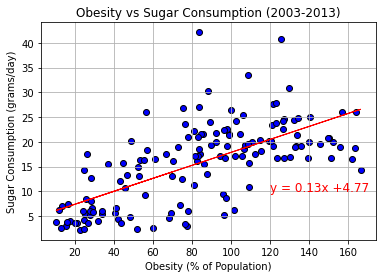

In [55]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(sugar_obesity_df.iloc[:,0], sugar_obesity_df.iloc[:,1], marker="o", facecolors="blue", edgecolors="black")

# Formatting the scatter diagram with title, x & y labels, and x & y limits
plt.title ("Obesity vs Sugar Consumption (2003-2013)")
plt.ylabel("Sugar Consumption (grams/day)")
plt.xlabel("Obesity (% of Population)")
plt.grid()


(slope, intercept, rvalue, pvalue, stderr) = linregress(sugar_obesity_df.iloc[:,0], sugar_obesity_df.iloc[:,1])
# Output of correlation coefficient and linear regression model
print(f"The correlation coefficient between obesity vs sugar consumption is {round(rvalue,2)}")
print(f"slope = {round(slope,2)}, intercept = {round(intercept,2)}, r-value = {round(rvalue, 2)}, p-value = {round(pvalue,2)}, standard error = {round(stderr,2)}")

# Calculate the values for the regression line (y=mx+b)
best_fit = slope * sugar_obesity_df.iloc[:,0] + intercept

# Format the regression line formula to be displayed on the graph
best_fit_equation = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

# Plot regression line
plt.plot(sugar_obesity_df.iloc[:,0],best_fit,linewidth = 1,color="red")
# Plot regression formula on graph
plt.annotate(best_fit_equation, (120, 10), fontsize=12, color='red')

plt.savefig("Obesity vs Sugar Consumption")
